In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\Stock price movements analysis\\DJIA\\DJIA(ClosingVal-tomorrow).csv")

In [3]:
df.head()

Date         Open         High          Low     Volume        Close
0  8/11/2008  11729.66992  11867.11035  11675.53027  183190000  11782.34961
1  8/12/2008  11781.70020  11782.34961  11601.51953  173590000  11642.46973
2  8/13/2008  11632.80957  11633.78027  11453.33984  182550000  11532.95996
3  8/14/2008  11532.07031  11718.28027  11450.88965  159790000  11615.92969
4  8/15/2008  11611.20996  11709.88965  11599.73047  215040000  11659.90039

In [4]:
df.tail()

Date         Open         High          Low     Volume        Close
1982  6/24/2016  17946.63086  17946.63086  17356.33984  239000000  17400.75000
1983  6/27/2016  17355.21094  17355.21094  17063.08008  138740000  17140.24023
1984  6/28/2016  17190.50977  17409.72070  17190.50977  112190000  17409.72070
1985  6/29/2016  17456.01953  17704.50977  17456.01953  106380000  17694.67969
1986  6/30/2016  17712.75977  17930.60938  17711.80078  133030000  17929.99023

In [5]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [6]:
df.shape

(1987, 6)

In [7]:
del df['Date']

In [8]:
X=df
X=np.array(X.drop(['Close'],1))
y=np.array(df['Close'])

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
xtrain.shape

(1589, 4)

In [11]:
ytrain.shape

(1589,)

In [12]:
xtest.shape

(398, 4)

In [13]:
ytest.shape

(398,)

### LASSO

In [32]:
from sklearn.linear_model import Ridge

In [33]:
ls = Ridge()
ls.fit(xtrain, ytrain)

Ridge()

In [34]:
ls_predictions = ls.predict(xtest)
ls_predictions

array([ 8629.18349503, 16974.69009704, 11218.90789594, 14808.48875225,
       17312.94504563, 10279.46676131, 13060.8146094 , 17867.48175745,
       15653.0078656 , 13458.53792565, 15308.57219824,  9908.97568976,
       15453.29889646, 17643.46754029, 12042.04765833, 17046.24848892,
       18002.61520999, 12561.93530621, 10239.1193258 ,  9183.53934608,
       12503.22997119, 15354.64015877, 10938.02823213, 18051.95838122,
       16309.8076601 , 13045.24592113, 14784.55399002, 12103.36698521,
       12363.39586706,  8311.83596974, 11175.62012389,  8634.04681617,
       15932.01935701, 13225.7034239 , 15570.25911575,  8019.9541859 ,
       14012.95044081, 15243.48459655, 11011.54109131, 17256.34045954,
       16924.63538629, 10860.73821863,  8260.34768538, 17738.33287627,
       11260.68781293, 15526.54497961, 15307.47084517, 11094.58740812,
       10309.69941747, 12338.77904823, 16498.38145616, 10259.37957339,
       11088.30905353,  7749.63578474, 17659.46684452, 12521.32254739,
      

In [35]:
def mda(ytest:np.ndarray,predicted:np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(ytest[1:]-ytest[:-1])== np.sign(predicted[1:]- predicted[:-1])).astype(int))

In [36]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ls_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ls_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ls_predictions)))
print('Mean Directional Accuracy:', mda(ytest, ls_predictions))

Mean Absolute Error: 40.13394991495802
Mean Squared Error: 3210.735377380124
Root Mean Squared Error: 56.663351272053475
Mean Directional Accuracy: 0.9899244332493703


### Predicting for 26th March using 25th Open, High, Low, Volume

In [37]:
ls.predict([[32346.81,32672.69,32071.41,411990000]])

array([32390.51095208])

### Graph

In [38]:
import matplotlib.pyplot as plt

In [39]:
newdf=pd.read_csv("C:\\Users\\User\\Desktop\\Stock price movements analysis\\DJIA\\DJIA(DataFrom25March)-Today.csv")

In [40]:
newdf.head()

Date      Open      High       Low       Volume     Close
0  3/25/2021  32346.81  32672.69  32071.41  411990000.0  32619.48
1  3/26/2021  32681.07  33098.83  32681.07  382170000.0  33072.88
2  3/29/2021  33087.55  33259.00  32905.13  351610000.0  33171.37
3  3/30/2021  33127.88  33170.93  32988.92  307510000.0  33066.96
4  3/31/2021  33116.04  33173.77  32980.57  414140000.0  32981.55

In [41]:
keep_columns=['Open','High','Low','Volume']
newxval=newdf[keep_columns]

In [42]:
predictions = ls.predict(newxval)

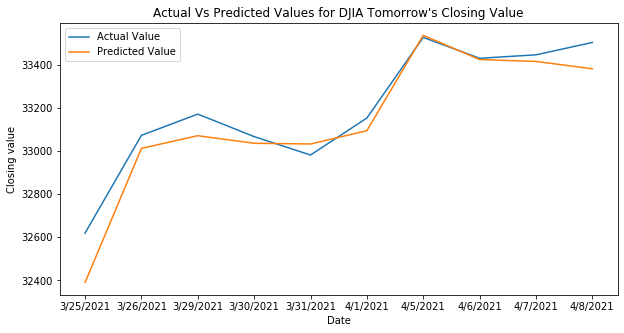

In [44]:
plt.figure(figsize=(10,5))
plt.plot(newdf['Date'],newdf['Close'], label ='Actual Value')
plt.plot(newdf['Date'],predictions, label ='Predicted Value')
plt.xlabel('Date')
plt.ylabel('Closing value')
plt.title("Actual Vs Predicted Values for DJIA Tomorrow's Closing Value")
plt.legend()